# Using Machine Learning to Predict Images Seen From Blood-Oxygenation Levels in the Visual Cortex

# I. Introduction to the Visual Cortex

<img src="Neuroscience_Images/fMRI_Image.png">

The visual cortex is the area within the brain responsible for processing visual information.  The visual cortex is located in the occipital lobw within the brain which is in turn located in the rear of the head.  There are multiple parts within the cortex however.  These are broken into two parts, the striate (visual area one) and the extrastriate areas (visual area two, three, four, and five).  The visual cortex also spans both hemispheres with the right half of the cortex processing the left image input and the left half processing the right image input.

But how do image stimuli get to the brain?  That is thanks to the optic nerve.  This nerve terminates at what is called the lateral geniculate nucleus, which is the first part of the brain's visual pathways.  The lateral geniculate nucleus then projects the information to the primary visual cortex which is where the image reconstruction begins.
    
This primary section of the visual cortex is the striate cortex, or V1 that was mentioned previously.  V1 also corresponds to the Brodmann area 17, which is a region of the cerebral cortex that is defined by its structure and organization of cells.  The extrastriate cortical areas correspond to Brodmann areas 18 and 19.  After V1, a large proportion of the connections are sent to the seondary visual cortex, or V2.  This part of the cortex is similar to V1, however it is able to respond to more complex shapes.
    
This analysis then continues through two major cortical systems, the ventral pathway which is thought to beresponsible for recognizing objects and the dorsal pathway which appears to be essential for locating objects.

# II. The Individual Cortex Areas

<img src="Neuroscience_Images/Visual_Cortex_Areas.png">

### V1)

The V1 area of the visual cortex is, to put it simply, the earliest cortical visual area.  This section of the cortex is devoted mostly to information about static and moving objects and excels at pattern recognition.  This V1 area is divided into six layers, labeled 1 through 6.  Layer 4 is then divided into four subsequent layers, 4A, 4B, 4C$\alpha$ and 4C$\beta$.  Furthermore, the V1 section has a well-defined map of spatial information for vision.

### V2)

The V2 section of the cortex, also called the secondary visual cortex or the prestriate cortex, is the region with the visual association area.  This part of the cortex recieves strong signals from V1 and in turn pases strong connections to V3, V4, and V%.  Also, it sends feedback connections to V1.  This parts of the cortex is split into four quadrans.  With a dorsal and ventral representation in each hemisphere.  These regios give a complete map of the visual world.  Similar to V1, V2 has cells tuned to things like orientation and color.  The V2 cells also have a small amount of what is called attentional modulation.  This means that the cells are tuned for moderately complex patterns.

### V3)

V3 is located immediately in front of V2 and includes the region in humans called the visual area V3.  This "complex" name is due to the fact that some controversy still exists regarding the exact extent of the area.  Two sections, Dorsal V3 and Ventral V3 have differnt functions within the area of the visual cortex.  Dorsal V3 recieves input from V2 and the primary visual area and projects this to the posterial parietal cortex.  This is located in Brodmann area 19.  The neurons in this area respond to coherent motion, or global motion, of large patterns that cover a large part of the field of vision.  The Vental V3 area, however, has weaker connections from the primary visual area and stronger ones with the inferior temporal cortex.

### V4)

The V4 area is located in what is known as the extrastriate visual cortex.  V4 recieves strong input from V2 and sends strong signals to the posterior inferotemporal area.  Also, it recieves direct signals from V1, especially for central space.  Furthermore, it has weaker connections to V5 and the orsal prelunate gyrus.  This area of the visual cortex shows string attentional modulation, with selective attention changing firing rates in V4 by about 20%.  V4 is tuned for orientation, spatial frequency, and color.  However, it is also tuned for object features of intermediate complexity but is not tuned for complex features such as a person's face like the areas within te inferotemporal cortex.

### V5)

The V5 area is thought to play a major role in motion perception, the intefration of local motion signals into global precepts, and the guidance of some eye movements.  It is connected to a wide range of brain areas, recieving input from areas V1, V2, Dorsal V3, and the koniocellular regios of the lateral geniculate nucleus. The neurons in the V5 area are tuned to the speed and direction of moving stimuli, which suggests that the area plays a significant role in processing visual information.

### V6)

The nuerons in this area have responsive properties that include sharp selectivity for the orientation of visual contours, and preference for long uninterrupted lines convering large parts of teh visual field.  Also, as small portino shows selectivity for the direction of motion of visual patterns.

# III. The Program

Be warned, I only have this working for dataset 3 at the moment. The 'datasetLength' number is for the length of the active voxels in the dataset. This changes for each of the five so I need to change my code to reflect that.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


First, we have to imprt the necessary modules for the program.

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pylab as py
import matplotlib.image as mpimg
from PIL import Image

This is the "organism" that we will be using for the genetic algorithm and "breeding" in order to create more accurate generations.  The organism must have a fitness function (checkAccuracy) in order to allow the accuracy of each one to be determined by the algorithm.  Also, the organism contains a color creating function in order to facilitate drawing.

In [3]:
class Organism:

    global logicArray
    global pixels
    global pixelLogic
    global deltaArray
    global turnedOff

    def __init__(self):
        self.logicArray = []
        self.pixels = []
        self.pixelLogic = []
        self.deltaArray = []

    def getDeltaArray(self):
        return(self.deltaArray)

    def getLogicArray(self):
        return(self.logicArray)

    def getPixels(self):
        return(self.pixels)

    def getPixelLogic(self):
        return(self.pixelLogic)
    
    def getTurnedOff(self):
        return(self.turnedOff)

    def setDeltaArray(self, temp):
        self.deltaArray = temp;

    def setLogicArray(self, temp):
        self.logicArray = temp;

    def setPixels(self, temp):
        self.pixels = temp;

    def setPixelLogic(self, temp):
        self.pixelLogic = temp;
    
    def setTurnedOff(self, temp):
        self.turnedOff = temp

    def checkAccuracy(self, predictionData, stimulusData):
        totalNum = 0
        error = 10
        for i in range(0,64):
            for j in range(0,64):
                if stimulusData[i][j] != 187:
                    totalNum = totalNum + 1
        numberCorrect = 0
        for i in range(0,64):
            for j in range(0,64):
                if (stimulusData[i][j] != 187 and predictionData[i][j] != 187) and abs(abs(stimulusData[i][j]) - abs(predictionData[i][j])) < error:
                    numberCorrect = numberCorrect + 1
        return float(numberCorrect) / float(totalNum)

    def createColors(self, pixels):
        colors = []
        for i in range(0,64):
            tempArray = []
            for j in range(0,64):
                tempArray.append(187)
            colors.append(tempArray)
        for i in range(0,len(pixels)):
            colorVal = 0
            for j in range(0,len(self.pixelLogic[i])):
                colorVal = colorVal + self.logicArray[self.pixelLogic[i][j]]
            if colorVal > 0:
                colors[pixels[i][0]][pixels[i][1]] = pixels[i][2]
            if colorVal <= 0:
                colors[pixels[i][0]][pixels[i][1]] = 0
        return(colors)

This returns the oxygenation levels for a specific stimulus image.

In [4]:
def getBetas(betas2, datasetLength, predictNum):
    betaVals2 = []
    for i in range(0,datasetLength):
        string = betas2.readline()
        for j in range(0, predictNum):
            tempIndex1 = string.find('   ')
            tempIndex2 = string.find('  -')
            if (tempIndex1 < tempIndex2 and tempIndex1 > -1) or tempIndex2 == -1:
                string = string[tempIndex1 + 3:]
            else:
                string = string[tempIndex2 + 2:]
        tempIndex01 = string.find('   ')
        tempIndex02 = string.find('  -')
        endIndex = tempIndex02
        if tempIndex01 < tempIndex02 or tempIndex02 == -1:
            endIndex = tempIndex01
        stringTemp = string[0:endIndex]
        num = float(stringTemp[0:stringTemp.find('e')])
        exponent = int(stringTemp[stringTemp.find('e') + 1:stringTemp.find('e') + 4])
        betaVals2.append(float(num * 10 ** exponent))
    return betaVals2

Returns the entire dataset of blood oxygenation levels.  This is used in the changing of the logic array in order to determine the actual oxygenation level for the stimulus image.

In [5]:
def getFullBetas(betas2, datasetLength, predictNum, indexStart):
    betas2.close()
    numbers = []
    for i in range(0, predictNum - indexStart+ 1):
        numbers.append([])
    for i in range(indexStart, predictNum + 1):
        betas = open('Data_Sets/dataset03_betas.txt')
        for j in range(0,datasetLength):
            string = betas.readline()
            for k in range(0, i):
                tempIndex1 = string.find('   ')
                tempIndex2 = string.find('  -')
                if (tempIndex1 < tempIndex2 and tempIndex1 > -1) or tempIndex2 == -1:
                    string = string[tempIndex1 + 3:]
                else:
                    string = string[tempIndex2 + 2:]
            tempIndex01 = string.find('   ')
            tempIndex02 = string.find('  -')
            endIndex = tempIndex02
            if (tempIndex01 != -1 and tempIndex01 < tempIndex02) or tempIndex02 == -1:
                endIndex = tempIndex01
            stringTemp = string[0:endIndex]
            num = float(stringTemp[0:stringTemp.find('e')])
            exponent = int(stringTemp[stringTemp.find('e') + 1:stringTemp.find('e') + 4])
            numbers[i - indexStart].append(float(num * 10 ** exponent))
        betas.close()
    return numbers

This function creates the pixel logic array for the prediction. The pixel logic array corresponds to each pixel with the values of all voxels that are "attatched" to that pixel, that is control if it is on or off

In [6]:
def createPredictionArray(logicArray, deltaArray, fullLogic, index, indexStart):
    temp = changeLogicArray(logicArray, deltaArray, fullLogic, index, indexStart)
    return temp[0], temp[1]

This gets which pixels are not part of the "background radiation" caused by the baseline voxels (or at least I'm assuming that -- might not be the right approach but I'm guessing my way through the neuroscience here)

In [7]:
def getNonBackgroundPixels(stimulusData):
    nonBackground = []
    for i in range(0,64):
        for j in range(0,64):
            if stimulusData[i][j] != 187:
                isInBaseline = False
                nonBackground.append([i,j,stimulusData[i][j]])
    return nonBackground

This gets the baseline blood oxigenation levels (to be subtracted from the 'new' levels for each image) and the baseline pixels that are on.

In [8]:
def getBaseline(indexStart, indexLength, betas, baseLogic):
    basePixels = []
    numbers = []
    #totalStim = []
    
    for i in range(0,datasetLength):
        numbers.append(0)

    #Read in the blood oxigenation levels for each image
    #add them together
    #and then get the average in order to get the baseline

    for i in range(indexStart - 69, indexLength - 69):
        betas = open('Data_Sets/dataset03_betas.txt')
        for j in range(0,datasetLength):
            string = betas.readline()
            for k in range(0, i):
                tempIndex1 = string.find('   ')
                tempIndex2 = string.find('  -')
                if (tempIndex1 < tempIndex2 and tempIndex1 > -1) or tempIndex2 == -1:
                    string = string[tempIndex1 + 3:]
                else:
                    string = string[tempIndex2 + 2:]
            tempIndex01 = string.find('   ')
            tempIndex02 = string.find('  -')
            endIndex = tempIndex02
            if (tempIndex01 != -1 and tempIndex01 < tempIndex02) or tempIndex02 == -1:
                endIndex = tempIndex01
            stringTemp = string[0:endIndex]
            num = float(stringTemp[0:stringTemp.find('e')])
            exponent = int(stringTemp[stringTemp.find('e') + 1:stringTemp.find('e') + 4])
            numbers[j] = numbers[j] + float(num * 10 ** exponent)
    for i in range(0,datasetLength):
        numbers[i] = numbers[i] / indexLength

    #This gets the pixels for each image and compares them to the baseline in order to determine which are shared and therefore which are baseline pixels

    pixelLogic = []
    
    for i in range(indexStart, indexLength - 1):

        #This is getting the pixels
        inStim = open('Stimulus_Data/StimData' + str(i) + '.txt');
        stimData = []
        for j in range(0,64):
            inData = inStim.readline()
            pixelCounter = 0
            tempColors = []
            x = 0
            while inData.find(' ') != -1:
                colorVal = int(inData[0:inData.find(' ')]) #Grab the number using the spaces to denote the beginning and end
                tempColors.append([j,x,colorVal]) 
                inData = inData[inData.find(' ') + 1:] #Shift by one space and therefore one cell
                x = x + 1
            stimData.append(tempColors)

        #Open the next image's file and do the same parsing for it

        inStim2 = open('Stimulus_Data/StimData' + str(i + 1) + '.txt');
        stimData2 = []
        pixelList = []
        for j in range(0,64):
            inData2 = inStim2.readline()
            pixelCounter = 0
            tempColors = []
            x = 0
            while inData2.find(' ') != -1:
                colorVal = int(inData2[0:inData2.find(' ')])
                tempColors.append([j,x,colorVal])
                inData2 = inData2[inData2.find(' ') + 1:]
                x = x + 1
            stimData2.append(tempColors)
        list1 = []
        list2 = []
        for i in range(0,64):
            for j in range(0, 64):
                if stimData[i][j][2] != 187:
                    list1.append(stimData[i][j])
                if stimData2[i][j][2] != 187:
                    list2.append(stimData2[i][j])
        for k in range(0, len(list1)):
            for l in range(0,len(list2)):
                if list1[k] == list2[l]:
                    isAlreadyInBase = False
                    for m in range(0,len(basePixels)):
                        if(list1[k] == basePixels[m]):
                            isAlreadyInBase = True
                    if isAlreadyInBase == False:
                        basePixels.append(list1[k])
    
    for i in range(0, len(basePixels)):
        pixelLogic.append([])
    oldLength = len(oldPixels)
    for i in range(0,len(pixelLogic)):
        triedRandNums = []
        for j in range(0,len(numbers)):
            if numbers[j] > 0:
                triedRandNums.append([numbers[j], j])
        randNums = []
        for j in range(0,len(triedRandNums)):
            rand = random.randint(0,len(triedRandNums) - 1)
            randNums.append(triedRandNums[rand])
            del(triedRandNums[rand])
        counter = -1
        for j in range(0,len(randNums)):
            if randNums[j][0] != 0:
                counter = j
                j = len(randNums)
        if counter != -1:
            pixelLogic[i].append(randNums[counter][1])

    return numbers, basePixels, baseLogic, pixelLogic

In [9]:
def getImageColors(filename):
    im = Image.open(filename, 'r')
    pix = im.load()
    iColors = []
    for i in range(0,256):
        temp = []
        for j in range(0,256):
            if pix[j,i] == 127:
                temp.append(0)
            else:
                temp.append(pix[j,i])
        iColors.append(temp)
    return iColors

This function checks the accuracy of the image, with 187 being the backgroud color.

In [10]:
def checkAccuracy(predictionData, stimulusData):
    error = 10
    totalNum = 0
    for i in range(0,64):
        for j in range(0,64):
            if stimulusData[i][j] != 187:
                totalNum = totalNum + 1
    numberCorrect = 0
    for i in range(0,64):
        for j in range(0,64):
            if (stimulusData[i][j] != 187 and predictionData[i][j] != 187) and (abs(stimulusData[i][j] - predictionData[i][j] < error)):
                numberCorrect = numberCorrect + 1
    return float(numberCorrect) / float(totalNum)

This creates the colors based on which voxel is on.

In [11]:
def createColorsForDrawing(pixels, pixelLogic, logicArray, deltaArray):
    colors = []
    for i in range(0,64):
        tempArray = []
        for j in range(0,64):
            tempArray.append(0)
        colors.append(tempArray)
    for i in range(0,len(pixels)):
        colorVal = 0
        counter = 0
        temp = 0
        for j in range(0,len(pixelLogic[i])):
            if deltaArray[pixelLogic[i][j]][0] > 0:
                temp = temp + deltaArray[pixelLogic[i][j]][0]
                counter = counter + 1
        if counter > 0:
            colorVal = temp / counter
        if colorVal < 0:
            colorVal = 0
        colors[pixels[i][1]][pixels[i][0]] = (colors[pixels[i][1]][pixels[i][0]] + colorVal) / 2
    return(colors)

This function changes the logic array to reflect the change in blood oxygenation so that it can be determined which voxel is "on" and which is "off".

In [12]:
def changeLogicArray(logicArray, deltaArray, baseLogic, index, indexStart):
    deviation = 1
    oldLogicArray = []
    betas = open('Data_Sets/dataset03_betas.txt')
    #tempLogic = getFullBetas(betas, datasetLength, index, indexStart)
    oldLogicArray = logicArray[:]
    logicArray = getBetas(betas, datasetLength, index - 69)
    betas.close()
    deltaLogicArray = []
    for i in range(0,datasetLength):
        #logicArray[i] = oldLogicArray[i] + logicArray[i]
        if logicArray[i] > 0 and logicArray[i] - oldLogicArray[i] > 0:
            deltaLogicArray.append([logicArray[i], i])
        else:
            deltaLogicArray.append([-1, i])
    return logicArray, deltaLogicArray, oldLogicArray

This correlates new pixels that are on with new voxels that are "on".  It then assigns the new voxels to the organisms randomly which creates the random mutations for the population.

In [13]:
def correlate(oldPixels, baseLogic, organisms, stimulusData, stimulusNumbers, index, indexStart, numOfMutations):
    difference = 5
    print('    Correlating pixels...')
    for h in range(0,len(organisms)):
        pixelLogic = organisms[h].getPixelLogic()
        logicArray = organisms[h].getLogicArray()
        pixelsToCheck = getNonBackgroundPixels(stimulusData)
        pixelsNowOn = []
        pixelsNowOff = []
        deltaArray = []
        for i in range(0,datasetLength):
            deltaArray.append(stimulusNumbers[i])
        tempLogic = changeLogicArray(logicArray, deltaArray, baseLogic, index, indexStart)
        logicArray = tempLogic[0]
        deltaLogic = tempLogic[1]
        oldLogicArray = tempLogic[2]
        turnedOff = organisms[h].getTurnedOff()
            
        #Determine which pixels have turned on
        
        for i in range(0, len(pixelsToCheck)):
            inOldPixels = False
            for j in range(0, len(oldPixels)):
                if oldPixels[j] == pixelsToCheck[i]:
                    inOldPixels = True
            if inOldPixels == False:
                pixelsNowOn.append(pixelsToCheck[i])
                pixelLogic.append([])
            
        oldLength = len(oldPixels)

        #Correlate voxels to pixels randomly because I don't know of a better way to do it because I don't know the neuroscience
        
        triedRandNums = []
        for j in range(0,len(deltaLogic)):
            if deltaLogic[j][0] > 0:
                triedRandNums.append(deltaLogic[j])
        for i in range(0,len(pixelsNowOn)):
            for j in range(0,len(triedRandNums)):
                #pixelLogic[i + oldLength].append(randNums[counter][1])
                pixelLogic[i + oldLength].append(triedRandNums[j][1])
        organisms[h].setPixelLogic(pixelLogic)
        organisms[h].setLogicArray(logicArray)
        organisms[h].setDeltaArray(deltaLogic)
    for i in range(0,len(pixelsNowOn)):
        oldPixels.append(pixelsNowOn[i])
    if index == indexStart:
        temp = organisms[:]
        for i in range(0, len(organisms)):
            organisms[i] = crossOrganisms(temp, i, random.randint(0, len(organisms) - 1), numOfMutations)
    return organisms, oldPixels

# IV. The Genetic Algoritm

## What is a Genetic Algorithm?

In the simplest terms, a genetic algorithm is an algorithm that mimics natural selection.  Genetic algorithms also belong to the larger class of evolutionary algorithms which use things such as mutation and crossover in order to solve problems.  In genetic algorithms, a population of candidate solutions is evolved towards better solutions.  Each solutions has properties which can be changed.  The first individuals are usually randomly created, and them for example mutated from generation of solutions to generation.  In each generation the fitness of each candidate is evaluated in order to determine the value of the solution.  The fittest individuals are selected and each "genome" is then modified to form a new generation.  The new generation is then put through the same process in an attempt to create better performance.  Commonly, the algorithm is ended when a satisfactory accuracy or fitness level is reached or a maximum number of generations is reached.  Typically genetic algorthms require a genetic representation of the solution and a fitness function.

### Overview

Genetic algorithms simulate survival of the fittest over generations at their base level. Each generation holds data analagous to those found in DNA.  Each individual in the population represents a possible soultion to the problem.  Then, the individuals proceed through an evolution.

### Initialization of a Genetic Algorithm

Commonly genetic algorithms are initialized with a randomly generatied population.  The actual size of the population depends on the problem attempting to be solved, however typically it can range in the several hundreds or thousands of possible solutions.  Sometimes, however, the initial population may be initialized in such a way to begin in area where optimal solutions are to be found.

### Selection

For every iteration, or generation, a group of organisms is chosen to breed with the others in order to create the new generation.  The fitness function, used to select the optimal individuals, measures the quality of the solution. This function is always problem dependent.

### Natural Selection

This algorithm evolves through three operators:

Selection -- Survival of the fittest

Crossover -- Mating

Mutation -- Introduces random modifications

##### Selection Operator

This operator gives preference to better individuals.  This then allows them to pass on their genes in order to create better and better generations.  The preference is defined by the goodness of each individual, which in turn depends on the fitness.  This fitness may be determined by an objective function or a subjective judgement.

###### Crossover Operator

This is the main distinguishing factor from other algorithms.  The genetic algorithm takes two individuals from the population using the selection operator and then "mates" them in order to combine the genes and hopefully create a more fit individual.

###### Mutation Operator

A portion of the population has genes altered which maintains diversity within the population. Mutation alone creates a random walk, so by combining mutation with selection (without crossover) a hill-climbing algorithm is created. 

# V. Evolutionary Algorithms

### Evolutionary Programming

Ues solutions that rely primarily on mutation and selection.  These algorithms use self-adaptation to change certain parameters and some algirhtms also will contain such operators as combining information from multiple parents.

### Gene Expression Programming

In gene expression programming the individuals are encoded as linear strings of
fixed length (the genome or chromosomes) which are afterwards
expressed as nonlinear entities of different sizes and
shapes (i.e., simple diagram representations or expression
trees)

### Genetic Programming

Genetic programming is a specialization of genetic algorithms where each "organism" or solution is a computer program itself.  This specialization makes mathematical expressions very easy to evolve and evaluate.

### Grouping Genetic Algorithm

Grouping genetic algorithms are designed for clustering problems.  They are a genetic framework for grouping problems inwhich each problem needs its own customization.  These are an extension of normal genetic algorithms tailored to grouping problems.

### Interactive Evolutionary Algorithms

These are genetic algorithms that use human evaluation as the fitness test.

# VI. The Return of the Program

Here is the learning function for the program.  The basis of this is the combination of different solutions to produce offspring while at the same time keeping the top organisms intact to prevent sliding backwards in fitness.  The solutions test themselves using the accuracy function against every image that has been learned as to prevent them from tailoring themselves to the last image, and then combine to form offspring that come together with the best solutions to create a new solution set.

In [14]:
def learn(organisms, accuracyThreshold, numOfGenerations, stimulusData, pixels, numOfTop, numOfMutations, initStim, stimCounter):
    topAccuracy = 0
    counter = 0
    accuracies = []
    indices = [0,1,2,3,4,5,6,7,8,9]
    print('    Learning...')
    while topAccuracy < accuracyThreshold and counter < numOfGenerations:
        accuracies = []
        tops = []
        indices = []
        for i in range(0,len(organisms)):
            accuracies.append(0)
            indices.append(i)
        for j in range(initStim, stimCounter):
            inStim2 = open('Stimulus_Data/StimData' + str(j) + '.txt');
            stimData2 = []
            for i in range(0,64):
                inData = inStim2.readline()
                pixelCounter = 0
                tempColors = []
                while inData.find(' ') != -1:
                    colorVal = int(inData[0:inData.find(' ')])
                    tempColors.append(colorVal)
                    inData = inData[inData.find(' ') + 1:]
                stimData2.append(tempColors)
            inStim2.close()
            for i in range(0, len(organisms)):
                accuracies[i] = accuracies[i] + organisms[i].checkAccuracy(organisms[i].createColors(getNonBackgroundPixels(stimData2)), stimData2)
        for i in range(0, len(organisms)):
            accuracies[i] = accuracies[i] / (stimCounter - initStim + 1)
        counter = counter + 1
        for i in range(0,len(accuracies) - 1):
            for j in range(i + 1, len(accuracies)):
                if accuracies[j] > accuracies[i]:
                    ti = indices[i]
                    ta = accuracies[i]
                    to = organisms[i]
                    indices[i] = indices[j]
                    accuracies[i] = accuracies[j]
                    organisms[i] = organisms[j]
                    indices[j] = ti
                    accuracies[j] = ta
                    organisms[j] = to
        topAccuracy = accuracies[0]
        for i in range(numOfTop, len(organisms)):
            organisms[i] = crossOrganisms(organisms[:], i, random.randint(0, numOfTop - 1), numOfMutations)
    for i in range(0,len(accuracies) - 1):
            for j in range(i + 1, len(accuracies)):
                if accuracies[j] > accuracies[i]:
                    ti = indices[i]
                    ta = accuracies[i]
                    to = organisms[i]
                    indices[i] = indices[j]
                    accuracies[i] = accuracies[j]
                    organisms[i] = organisms[j]
                    indices[j] = ti
                    accuracies[j] = ta
                    organisms[j] = to
    print('    Finished Learning')
    return(organisms, 0)

The mutation function, this part of the program is the basis of the variation between organisms.  After the organisms have been 'randomly' created, this function crossed the genes of one solution with those of another in order to produce an offspring that will hopefully achieve a better fitness.  

In [15]:
def crossOrganisms(organisms, index1, index2, numOfMutations):
    temp1 = organisms[index1]
    logicArray = organisms[index1].getLogicArray()[:]
    pixelLogic = organisms[index1].getPixelLogic()[:]
    deltaArray = organisms[index1].getDeltaArray()[:]
    turnedOff = organisms[index1].getTurnedOff()[:]
    la2 = organisms[index2].getLogicArray()[:]
    da2 = organisms[index2].getDeltaArray()[:]
    pl2 = organisms[index2].getPixelLogic()[:]
    for i in range(0, numOfMutations):
        rand = random.randint(0,len(logicArray) - 1)
        if turnedOff[rand] != 1:
            selection = random.randint(0,1)
            if selection == 1:
                logicArray[rand] = la2[rand]
                deltaArray[rand] = da2[rand]
    temp1.setLogicArray(logicArray)
    temp1.setPixelLogic(pixelLogic)
    temp1.setDeltaArray(deltaArray)
    return temp1

The draw function for the program, this simply takes in the array of colors and outputs an image to the screen.

In [16]:
def drawPrediction(predictionData):
    colorArray = []
    for i in range(0,64):
        colorArray.append([])
        for j in range(0,64):
            colorArray[i].append(predictionData[i][j] / 255)
    py.bone()
    py.axis('off')
    py.imshow(predictionData)
    
    py.show()

Save the images during the learning process.  After each learning call this function is called and the relevant image is saved to the 'figures' folder to be called at the end of the program in order to be displayed.

In [17]:
def saveImage(predictionData, ii):
    colorArray = []
    for i in range(0,64):
        colorArray.append([])
        for j in range(0,64):
            colorArray[i].append(predictionData[i][j] / 255)
    fig = py.figure()
    py.bone()
    py.axis('off')
    py.imshow(predictionData)
    py.savefig('Figures/Figure_' + str(ii) + '.png')
    py.close(fig)

Variable initialization

In [18]:
#Initialize a crap ton of variables -- a large number of which are no longer used

betas = open('Data_Sets/dataset03_betas.txt')
betas2 = open('Data_Sets/dataset03_betas.txt')
inStim2 = open('Stimulus_Data/StimData2.txt');
numbers = []
logic = []
organisms = []
stimNums = []
stimNums2 = []
stimNumsMatrix2 = []
positions = []
betaVals = []
betaVals2 = []
stimData = []
stimData2 = []
numbers2 = []
oldPixels = []
baseLogic = []
hasBeenMutated = []
accuracyThreshold = .9
index = 1
datasetLength = 1323
numOfOrgs = 5
numOfGenerations = 10
numOfTop = 3
numOfMutations = 10
previousPixelArray = []
py.ioff()
initStim = 70
scanNum = 3
numOfRuns = 1

The bulk of the program, this handles everything from the input of parameters to calling the learning functions.  The code initializes the baseline for the stimulus as well as all the relevant variables and then loops through the assigned images and attempts to learn from them.

In [19]:
# Get input parameters
print('Enter the initial stimulus image to scan (between 1 and 156)')
initStim = int(input()) + 69
print('Enter the number of stimulus images to scan (less than 156 - your intitial image number)')
scanNum = int(input())
print('Enter the number of the image to attempt to predict (Between 1 and 156)')
predictNum = int(input()) + 69
print('Enter the accuracy (1 - 100)')
accuracyThreshold = float(input()) / 100
print('Enter the number of iterations through the data')
numOfRuns = int(input())


inStim = open('Stimulus_Data/StimData' + str(initStim) + '.txt')

for i in range(0,numOfOrgs):
    organisms.append(Organism())

#Initialize the logic arrays

for i in range(0,len(organisms)):
    tempLogic = []
    turnedOff = []
    for j in range(0,datasetLength):
        tempLogic.append(1)
        turnedOff.append(0)
    organisms[i].setLogicArray(tempLogic)
    organisms[i].setTurnedOff(tempLogic)

#Load in the stimulus image pixel colors

for i in range(0,64):
    inData = inStim.readline()
    pixelCounter = 0
    tempColors = []
    while inData.find(' ') != -1:
        colorVal = int(inData[0:inData.find(' ')])
        tempColors.append(colorVal)
        inData = inData[inData.find(' ') + 1:]
    stimData.append(tempColors)

#Load in the change in blood oxigenation levels

for i in range(0,datasetLength):
    baseLogic.append(0)

#Get the baseline for the dataset

temp  = getBaseline(initStim, scanNum + initStim, betas, baseLogic)
baseline = temp[0]
baselinePixels = temp[1]
baseLogic = temp[2]

pixelLogic = []

for n in range(0, numOfRuns):
    print('----iteration {}----'.format(n + 1))
    for stimCounter in range(initStim, initStim + scanNum):

        print('  Working on image ' + str(stimCounter))

        betas2 = open('Data_Sets/dataset03_betas.txt')
        inStim2 = open('Stimulus_Data/StimData' + str(stimCounter) + '.txt');
        stimData2 = []
        stimNums2 = []
        betaVals2 = []
        oldLogic = logic[:]
        #Load in the next stimulus image pixel colors
        for i in range(0,64):
            inData = inStim2.readline()
            pixelCounter = 0
            tempColors = []
            while inData.find(' ') != -1:
                colorVal = int(inData[0:inData.find(' ')])
                tempColors.append(colorVal)
                inData = inData[inData.find(' ') + 1:]
            stimData2.append(tempColors)


        #Parse the data about the blood oxigination of the parts of the cortex
        for i in range(0,datasetLength):
            string = betas2.readline()
            for j in range(0, stimCounter):
                tempIndex1 = string.find('   ')
                tempIndex2 = string.find('  -')
                if (tempIndex1 < tempIndex2 and tempIndex1 > -1) or tempIndex2 == -1:
                    string = string[tempIndex1 + 3:]
                else:
                    string = string[tempIndex2 + 2:]
            tempIndex01 = string.find('   ')
            tempIndex02 = string.find('  -')
            endIndex = tempIndex02
            if tempIndex01 < tempIndex02 or tempIndex02 == -1:
                endIndex = tempIndex01
            stringTemp = string[0:endIndex]
            num = float(stringTemp[0:stringTemp.find('e')])
            exponent = int(stringTemp[stringTemp.find('e') + 1:stringTemp.find('e') + 4])
            betaVals2.append(float(num * 10 ** exponent))

        #Run the correlation code in order to begin learning
        temp = correlate(oldPixels, baseLogic, organisms, stimData2, betaVals2, stimCounter, initStim, numOfMutations)
        organisms = temp[0]
        oldPixels = temp[1]

        #This is where the actual learning code is -- but it doesn't freaking work right just yet
        temp = learn(organisms, accuracyThreshold, numOfGenerations, stimData2, oldPixels, numOfTop, numOfMutations, initStim, stimCounter)
        organisms = temp[0]
        topNum = temp[1]

        #Create colors and draw image
        colors = []
        colors = createColorsForDrawing(oldPixels, organisms[topNum].getPixelLogic(), organisms[topNum].getLogicArray(), organisms[topNum].getDeltaArray())
        pixelData = []
        saveImage(colors, stimCounter)
        baseColors = []

        betas2.close()
        inStim.close()






Enter the initial stimulus image to scan (between 1 and 156)
20
Enter the number of stimulus images to scan (less than 156 - your intitial image number)
10
Enter the number of the image to attempt to predict (Between 1 and 156)
22
Enter the accuracy (1 - 100)
75
Enter the number of iterations through the data
1
----iteration 1----
  Working on image 89
    Correlating pixels...
    Learning...
    Finished Learning
  Working on image 90
    Correlating pixels...
    Learning...
    Finished Learning
  Working on image 91
    Correlating pixels...
    Learning...
    Finished Learning
  Working on image 92
    Correlating pixels...
    Learning...
    Finished Learning
  Working on image 93
    Correlating pixels...
    Learning...
    Finished Learning
  Working on image 94
    Correlating pixels...
    Learning...
    Finished Learning
  Working on image 95
    Correlating pixels...
    Learning...
    Finished Learning
  Working on image 96
    Correlating pixels...
    Learning...
 

The prediction algorithm.  Creates logic and pixel arrays that work from the learned data in order to predict the image that will be seen by the program from blood oxygenation levels.

In [20]:
print('Working on image ' + str(predictNum) + '(prediction)')

#The actual prediction code -- creates the logic array and then uses that to create the colors and then draw the image

colors = []

deviation = .005
tl = []
tp = []
for i in range(0,datasetLength):
    tl.append(0)
deltaArray = []
deltaLogic = []
betas2 = open('Data_Sets/dataset03_betas.txt')
betas = getBetas(betas2, datasetLength, predictNum - 69)
betas2.close()
for i in range(0,datasetLength):
    deltaArray.append(betas[i])
    deltaLogic.append([betas[i], i])
temp = createPredictionArray(tl, deltaArray, baseLogic, predictNum, initStim)
tl = temp[0]
deltaLogic = temp[1]

for i in range(0,len(organisms[0].getPixelLogic())):
    tp.append([])
        
tl[0] = 0

pixelLogic = organisms[0].getPixelLogic()[:]
for j in range(0,len(pixelLogic)):
    for k in range(0,len(pixelLogic[j])):
        for i in range(0,len(organisms)):
            l = organisms[i].getLogicArray()[organisms[i].getPixelLogic()[j][k]]
            t = tl[organisms[i].getPixelLogic()[j][k]]
            d = abs(l) - abs(t)
            if abs(d) < deviation and d < 0 and t > 0 and l > 0:
                tp[j].append(organisms[i].getPixelLogic()[j][k])
                
colors = createColorsForDrawing(oldPixels, tp, tl, deltaLogic)

#Draw everything

inStim.close()

Working on image 91(prediction)


Draw Everything

Images
    Prediction


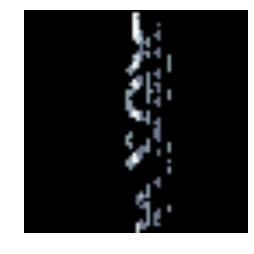

    Actual


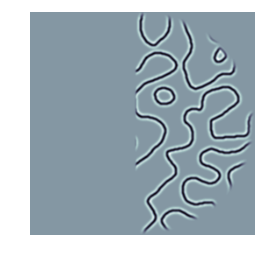

Vertical Brightness
    Prediciton


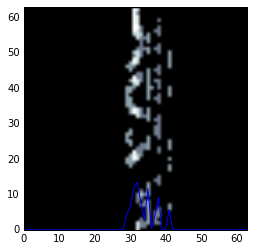

    Actual


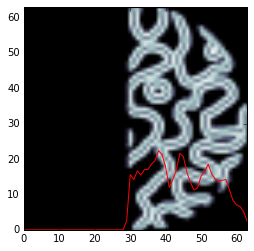

Horizontal Brightness
    Prediction


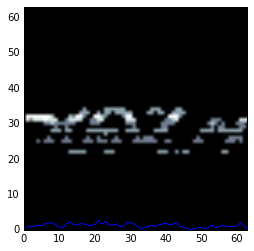

    Actual


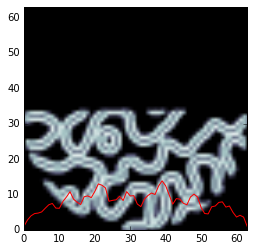

Brightness Comparison
   Vertical


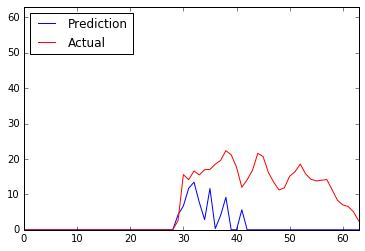

    Horizontal


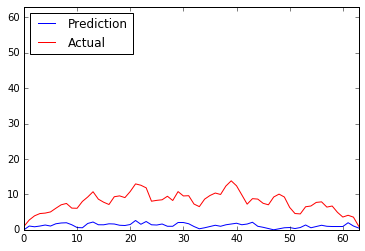

In [21]:
print
print('Images')
print
print('    Prediction')

drawPrediction(colors)

#Draw the actual image

figureNum = str(predictNum)
while len(figureNum) < 3:
    figureNum = '0' + figureNum

print('    Actual')
    
img = mpimg.imread('Images/thumbnails' + figureNum + '.png')
py.bone()
py.axis('off')
py.imshow(img)
py.show()

iColors = getImageColors('Images/thumbnails' + figureNum + '.png')
imgColors = []
for i in range(0,256,4):
    temp = []
    for j in range(0,256,4):
        t = 0
        for k in range(0,4):
            for l in range(0,4):
                t = t + iColors[i+k][j+l]
        t = float(t) / 16.0
        temp.append(t)
    imgColors.append(temp)

horizVals = []
vertVals = []
horizVals2 = []
vertVals2 = []
for i in range(0,64):
    temph = 0
    tempv = 0
    temph2 = 0
    tempv2 = 0
    for j in range(0,64):
        temph = temph + colors[i][j]
        tempv = tempv + colors[j][i]
        temph2 = temph2 + imgColors[i][j]
        tempv2 = tempv2 + imgColors[j][i] 
    temph = float(temph)
    tempv = float(tempv)
    temph2 = float(temph2)
    tempv2 = float(tempv2)
    horizVals.append(temph)
    vertVals.append(tempv)
    horizVals2.append(temph2)
    vertVals2.append(tempv2)

for i in range(0,len(vertVals)):
    horizVals2[i] = float(horizVals2[i]) / float(255)
    vertVals2[i] = float(vertVals2[i]) / float(255)    

colorsv = []
colorsh = []
colorsv2 = []
colorsh2 = []

for i in range(63,-1,-1):
    tempv = []
    temph = []
    tempv2 = []
    temph2 = []
    for j in range(0,64):
        tempv.append(colors[i][j])
        temph.append(colors[j][i])
        tempv2.append(imgColors[i][j])
        temph2.append(imgColors[j][i])
    colorsv.append(tempv)
    colorsh.append(temph)
    colorsv2.append(tempv2)
    colorsh2.append(temph2)
    
print('Vertical Brightness')
print
print('    Prediciton')

fig, ax = plt.subplots()
x1 = np.arange(0,len(vertVals))
y1 = vertVals
x2 = np.arange(0,len(vertVals))
y2 = vertVals2
ax.plot(x1, y1, label = 'Vertical Brightness (Prediction)', color='blue')
plt.axis([0,63,0,63])
py.imshow(colorsv)
py.plot()
py.show()

print('    Actual')

fig, ax = plt.subplots()
ax.plot(x2, y2, label = 'Vertical Brightness (Actual)', color='red')
plt.axis([0,63,0,63])
py.imshow(colorsv2)
py.plot()
py.show()

print('Horizontal Brightness')
print
print('    Prediction')

fig, ax = plt.subplots()
x1 = np.arange(0,len(vertVals))
y1 = horizVals
x2 = np.arange(0,len(vertVals))
y2 = horizVals2
ax.plot(x1, y1, label = 'Horizontal Brightness (Prediction)',color='blue')
plt.axis([0,63,0,63])
py.imshow(colorsh)
py.plot()
py.show()

print('    Actual')

fig, ax = plt.subplots()
ax.plot(x2, y2, label = 'Horizontal Brightness (Actual)', color='red')
plt.axis([0,63,0,63])
py.imshow(colorsh2)
py.plot()
py.show()

print('Brightness Comparison')
print
print('   Vertical')

fig, ax = plt.subplots()
x1 = np.arange(0,len(vertVals))
y1 = vertVals
x2 = np.arange(0,len(vertVals))
y2 = vertVals2
ax.plot(x1, y1, label = 'Prediction', color='blue')
ax.plot(x2, y2, label = 'Actual', color='red')
plt.axis([0,63,0,63])
plt.legend(loc='upper left')
py.plot()
py.show()

print('    Horizontal')

fig, ax = plt.subplots()
x1 = np.arange(0,len(vertVals))
y1 = horizVals
x2 = np.arange(0,len(vertVals))
y2 = horizVals2
ax.plot(x1, y1, label = 'Prediction',color='blue')
ax.plot(x2, y2, label = 'Actual', color='red')
plt.axis([0,63,0,63])
plt.legend(loc='upper left')
py.plot()
py.show()


Finally, output the generated images from the learning process.

Images Learned


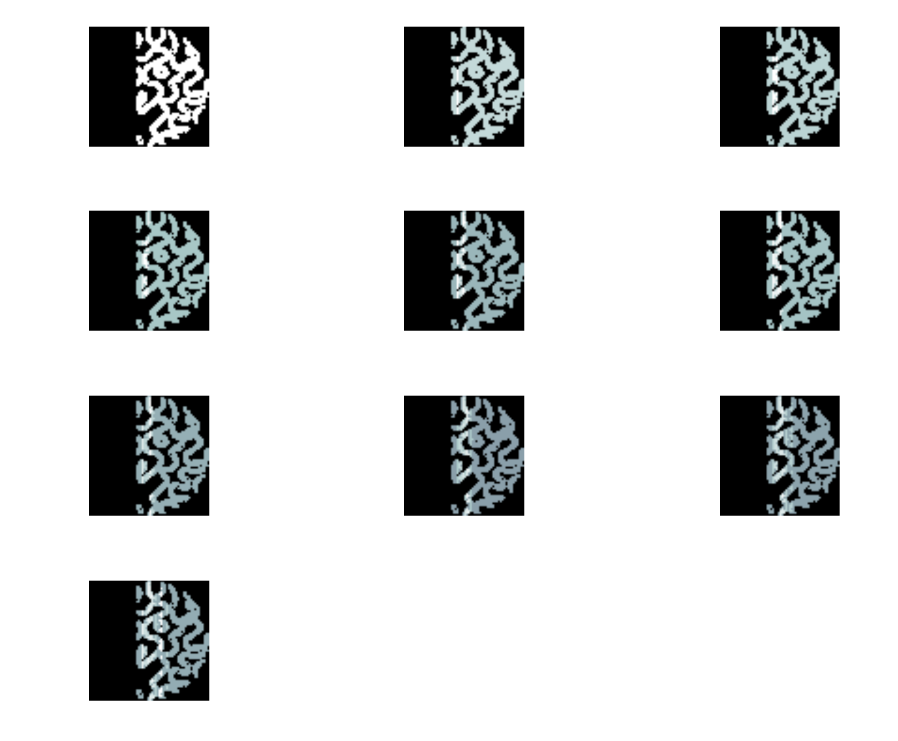

In [22]:
print('Images Learned')
fig = py.figure(figsize=(16,16))
for i in range(initStim, scanNum + initStim):
    fig.add_subplot(np.ceil(scanNum / 2), 3, (i - initStim) + 1)
    py.axis('off')
    img = mpimg.imread('Figures/Figure_' + str(i) +'.png')
    py.imshow(img)
py.show()

The data used by this progam is liscensed under a creative commons attribution 3.0 unsupported liscense and can be accessed at http://kendrickkay.net/socmodel/ along with the relevant information and sources
